## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration and Cleaning

1. Check and understand columns in the dataset.

In [2]:
#pd.reset_option("max_rows")
df = pd.read_csv("data/owid-co2-data.csv")
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48053,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,10.715,1.419,15.265,...,NaN,0.114,0.001,0.001,0.002,0.0,116.76,29.37,-0.088,-0.825
48054,Zimbabwe,2019,ZWE,15354606.0,NaN,0.473,0.031,9.775,-0.939,-8.765,...,NaN,0.113,0.001,0.001,0.002,0.0,116.03,28.70,0.143,1.463
48055,Zimbabwe,2020,ZWE,15669663.0,NaN,0.496,0.032,7.850,-1.926,-19.700,...,NaN,0.112,0.001,0.001,0.002,0.0,113.20,25.99,0.818,10.421
48056,Zimbabwe,2021,ZWE,15993525.0,NaN,0.531,0.033,8.396,0.547,6.962,...,NaN,0.111,0.001,0.001,0.002,0.0,NaN,NaN,1.088,12.956


In [3]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

2. Filtered unused columns.

In [4]:
df_subset = df[['country', 'year', 'iso_code', 'population', 'gdp', 'primary_energy_consumption', 'cement_co2', 'coal_co2', 'consumption_co2', 
                'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2', 'other_industry_co2', 'trade_co2', 'co2']]
df_subset

,country,year,iso_code,population,gdp,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.980,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.002,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.022,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.038,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.053,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48053,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,51.809,0.558,6.097,10.626,0.0,0.0,8.708,4.060,NaN,-0.088,10.715
48054,Zimbabwe,2019,ZWE,15354606.0,NaN,46.120,0.473,5.571,9.918,0.0,0.0,8.079,3.731,NaN,0.143,9.775
48055,Zimbabwe,2020,ZWE,15669663.0,NaN,41.997,0.496,4.309,8.668,0.0,0.0,7.609,3.045,NaN,0.818,7.850
48056,Zimbabwe,2021,ZWE,15993525.0,NaN,42.145,0.531,4.548,9.484,0.0,0.0,7.117,3.317,NaN,1.088,8.396


3. Basic exploration.

In [9]:
df_subset.describe(include='all')

,country,year,iso_code,population,gdp,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2
count,48058,48058.000000,39717,3.949500e+04,1.456400e+04,10103.000000,23764.000000,25075.000000,4718.000000,24992.000000,25083.000000,37022.000000,25111.000000,2593.000000,4398.000000,30308.000000
unique,264,NaN,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Macao,NaN,CIV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,273,NaN,273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1926.842565,NaN,6.083223e+07,2.677586e+11,2435.045751,9.109400,156.963937,1309.603291,3.636449,51.278100,124.515304,112.920681,17.499371,-7.157874,391.272161
std,NaN,59.414846,NaN,3.285867e+08,2.103151e+12,11029.856876,66.463548,765.720061,3825.367597,20.916280,316.033834,488.635011,629.451112,41.335944,269.156220,1855.824655
min,NaN,1750.000000,NaN,2.220000e+02,4.998000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-284.799000,0.000000,0.000000,-2367.758000,0.000000
25%,NaN,1883.000000,NaN,3.464375e+05,7.516679e+09,7.453500,0.000000,0.000000,11.404500,0.000000,0.000000,0.047000,0.084000,0.608000,-3.024750,0.183000
50%,NaN,1930.000000,NaN,2.456362e+06,2.597999e+10,66.822000,0.029000,0.703000,71.689500,0.000000,0.000000,3.862000,1.323000,2.850000,1.478500,3.856000
75%,NaN,1976.000000,NaN,1.008038e+07,1.132942e+11,455.249000,0.834000,16.988000,446.108250,0.000000,1.344500,23.906750,13.916000,10.562000,9.124000,47.277250


In [5]:
df_subset.dtypes

country                        object
year                            int64
iso_code                       object
population                    float64
gdp                           float64
primary_energy_consumption    float64
cement_co2                    float64
coal_co2                      float64
consumption_co2               float64
flaring_co2                   float64
gas_co2                       float64
land_use_change_co2           float64
oil_co2                       float64
other_industry_co2            float64
trade_co2                     float64
co2                           float64
dtype: object

In [6]:
df_subset[pd.isna(df_subset['iso_code']) == True]

,country,year,iso_code,population,gdp,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2
173,Africa,1750,NaN,7.627809e+07,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
174,Africa,1751,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
175,Africa,1752,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
176,Africa,1753,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
177,Africa,1754,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47534,World,2018,NaN,7.683790e+09,1.136302e+14,161402.734,1565.803,14725.245,36766.945,407.294,7498.021,4285.146,12267.438,303.145,0.000,36766.945
47535,World,2019,NaN,7.764951e+09,NaN,163163.344,1615.776,14684.313,37040.102,435.427,7621.427,4597.514,12377.949,305.210,0.000,37040.102
47536,World,2020,NaN,7.840953e+09,NaN,157357.797,1633.047,14225.915,35007.738,398.519,7555.261,4295.186,10899.948,295.048,0.000,35007.738
47537,World,2021,NaN,7.909295e+09,NaN,165946.156,1692.404,14982.517,36816.539,403.429,7922.112,4321.578,11514.740,301.340,-0.004,36816.543


4. Filtered unused rows.

In [10]:
df_subset = df_subset.drop(df_subset.loc[pd.isna(df_subset['iso_code'])].index)
df_subset

,country,year,iso_code,population,gdp,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.980,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.002,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.022,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.038,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.053,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48053,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,51.809,0.558,6.097,10.626,0.0,0.0,8.708,4.060,NaN,-0.088,10.715
48054,Zimbabwe,2019,ZWE,15354606.0,NaN,46.120,0.473,5.571,9.918,0.0,0.0,8.079,3.731,NaN,0.143,9.775
48055,Zimbabwe,2020,ZWE,15669663.0,NaN,41.997,0.496,4.309,8.668,0.0,0.0,7.609,3.045,NaN,0.818,7.850
48056,Zimbabwe,2021,ZWE,15993525.0,NaN,42.145,0.531,4.548,9.484,0.0,0.0,7.117,3.317,NaN,1.088,8.396


5. Check numerical values.

In [11]:
df_subset.isna().sum()

country                           0
year                              0
iso_code                          0
population                     2971
gdp                           25169
primary_energy_consumption    30308
cement_co2                    20359
coal_co2                      18445
consumption_co2               35897
flaring_co2                   18383
gas_co2                       18360
land_use_change_co2            5636
oil_co2                       18359
other_industry_co2            38083
trade_co2                     35897
co2                           15852
dtype: int64

In [12]:
#% for all cols
df_subset.isna().sum()/39862*100

country                        0.000000
year                           0.000000
iso_code                       0.000000
population                     7.453214
gdp                           63.140334
primary_energy_consumption    76.032311
cement_co2                    51.073704
coal_co2                      46.272139
consumption_co2               90.053183
flaring_co2                   46.116602
gas_co2                       46.058903
land_use_change_co2           14.138779
oil_co2                       46.056395
other_industry_co2            95.537103
trade_co2                     90.053183
co2                           39.767197
dtype: float64

We have a lot of missing values. I will try to find some insights which will help me cleaning more data.

In [13]:
#all countries, where we have lack of co2 emission data
first_valid_index = df_subset.groupby('country')['co2'].apply(lambda x: x.first_valid_index())
first_valid_index[first_valid_index.isna() == True]

country
Monaco        NaN
Puerto Rico   NaN
San Marino    NaN
Vatican       NaN
Name: co2, dtype: float64

Delete all counties with missing values about co2 emission.

In [14]:
for country, index in first_valid_index.items():
    if pd.isna(index):
        df_subset = df_subset.drop(df_subset.loc[df_subset['country'] == country].index)
df_subset

,country,year,iso_code,population,gdp,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.980,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.002,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.022,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.038,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.053,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48053,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,51.809,0.558,6.097,10.626,0.0,0.0,8.708,4.060,NaN,-0.088,10.715
48054,Zimbabwe,2019,ZWE,15354606.0,NaN,46.120,0.473,5.571,9.918,0.0,0.0,8.079,3.731,NaN,0.143,9.775
48055,Zimbabwe,2020,ZWE,15669663.0,NaN,41.997,0.496,4.309,8.668,0.0,0.0,7.609,3.045,NaN,0.818,7.850
48056,Zimbabwe,2021,ZWE,15993525.0,NaN,42.145,0.531,4.548,9.484,0.0,0.0,7.117,3.317,NaN,1.088,8.396


In [15]:
df_subset.isna().sum()

country                           0
year                              0
iso_code                          0
population                     2859
gdp                           24548
primary_energy_consumption    29660
cement_co2                    19669
coal_co2                      17755
consumption_co2               35207
flaring_co2                   17693
gas_co2                       17670
land_use_change_co2            5465
oil_co2                       17669
other_industry_co2            37393
trade_co2                     35207
co2                           15162
dtype: int64

In [16]:
#% for all cols
df_subset.isna().sum()/37970*100

country                        0.000000
year                           0.000000
iso_code                       0.000000
population                     7.529629
gdp                           64.651040
primary_energy_consumption    78.114301
cement_co2                    51.801422
coal_co2                      46.760600
consumption_co2               92.723203
flaring_co2                   46.597314
gas_co2                       46.536740
land_use_change_co2           14.392942
oil_co2                       46.534106
other_industry_co2            98.480379
trade_co2                     92.723203
co2                           39.931525
dtype: float64

6. Generate descriptive statistics.

In [18]:
df_subset.describe()

,year,population,gdp,primary_energy_consumption,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2
count,39027.000000,3.616800e+04,1.447900e+04,9367.000000,19358.000000,21272.000000,3820.000000,21334.000000,21357.000000,33562.000000,21358.000000,1634.000000,3820.000000,23865.000000
mean,1929.889717,1.505086e+07,2.263316e+11,614.569956,2.409284,38.505215,234.341456,0.908196,12.257067,31.763791,26.779040,6.114936,0.047724,72.441226
std,56.315908,7.162892e+07,9.405886e+11,2547.006483,22.996496,253.569071,812.617879,4.515045,76.828462,129.383323,140.684512,18.572046,105.586834,415.717506
min,1750.000000,2.220000e+02,4.998000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-238.351000,0.000000,0.000000,-1532.440000,0.000000
25%,1886.000000,3.183330e+05,7.462499e+09,6.024500,0.000000,0.000000,8.590750,0.000000,0.000000,0.039000,0.090250,0.502250,-1.072750,0.158000
50%,1932.000000,2.115788e+06,2.575528e+10,52.619000,0.044000,0.267000,38.448000,0.000000,0.000000,3.101000,1.044000,1.215000,1.772500,2.288000
75%,1977.000000,7.605704e+06,1.125314e+11,307.322000,0.675000,6.375000,147.052500,0.000000,0.616000,16.283750,8.198750,4.222250,8.763500,20.493000
max,2022.000000,1.425894e+09,1.815162e+13,44275.914000,858.233000,8250.736000,10320.089000,88.437000,1743.539000,2973.366000,2642.692000,177.257000,655.034000,11396.777000


6. Charts

<Axes: >

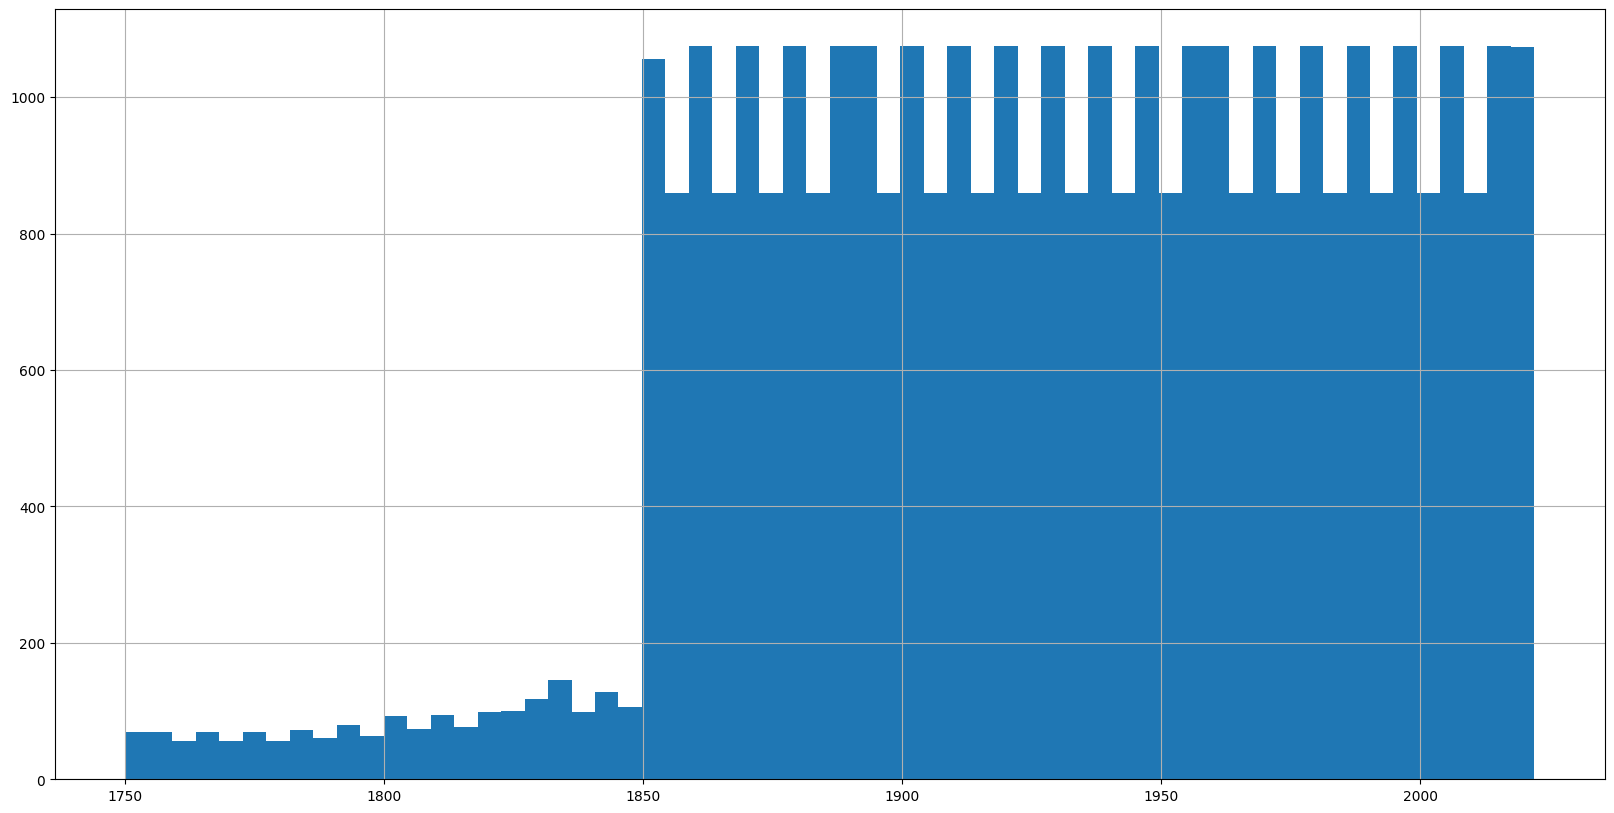

In [20]:
df_subset['year'].hist(bins = 60, figsize = (20,10))

<Axes: >

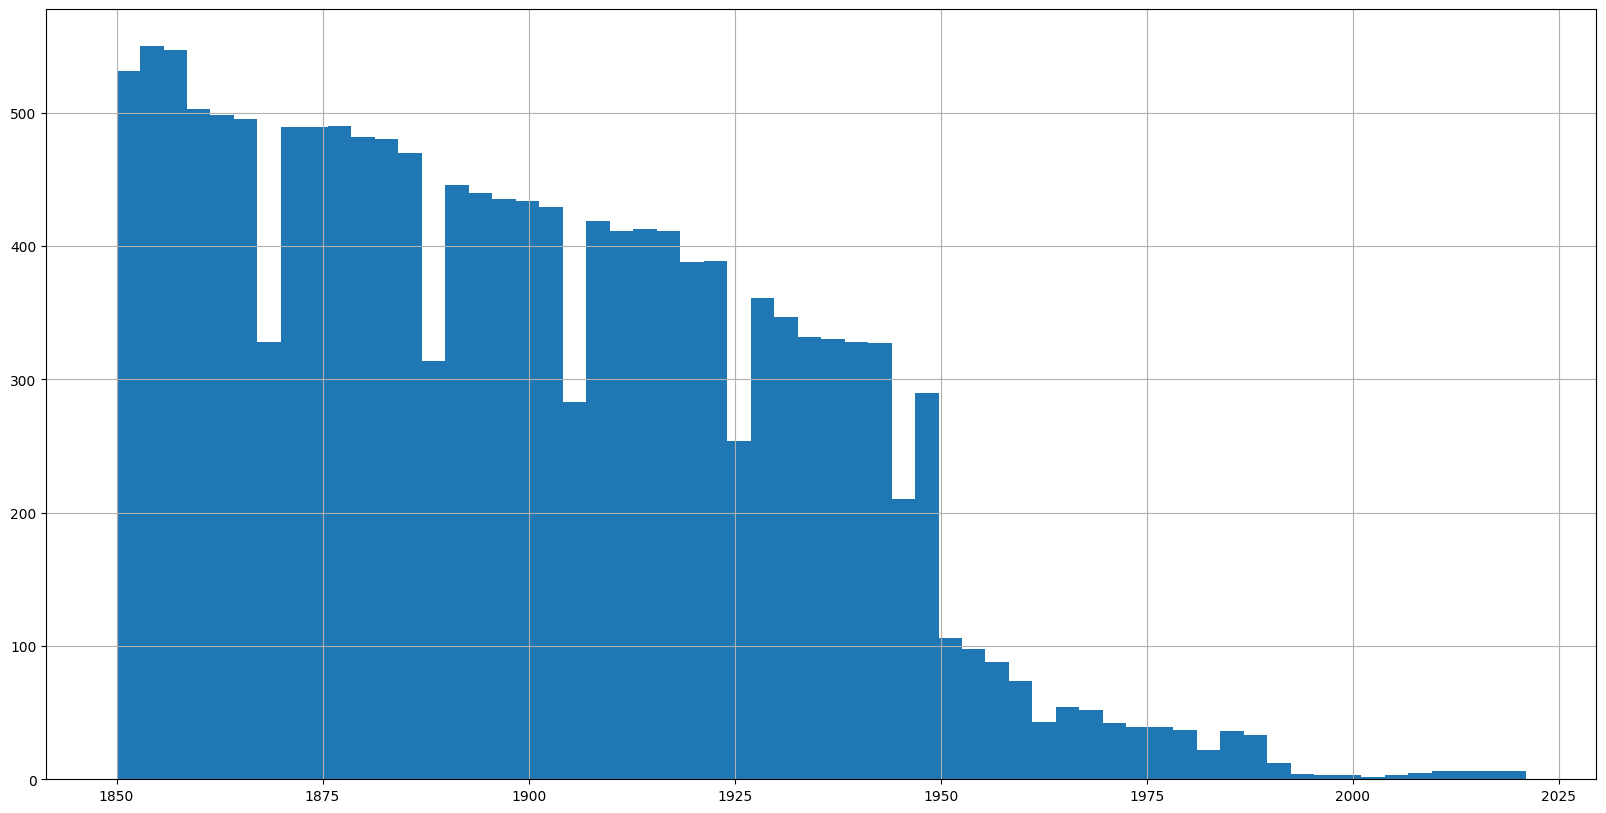

In [21]:
df_subset[df_subset['co2'].isna()]['year'].hist(bins = 60, figsize = (20,10))

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'gdp'}>,
        <Axes: title={'center': 'primary_energy_consumption'}>],
       [<Axes: title={'center': 'cement_co2'}>,
        <Axes: title={'center': 'coal_co2'}>,
        <Axes: title={'center': 'consumption_co2'}>,
        <Axes: title={'center': 'flaring_co2'}>],
       [<Axes: title={'center': 'gas_co2'}>,
        <Axes: title={'center': 'land_use_change_co2'}>,
        <Axes: title={'center': 'oil_co2'}>,
        <Axes: title={'center': 'other_industry_co2'}>],
       [<Axes: title={'center': 'trade_co2'}>,
        <Axes: title={'center': 'co2'}>, <Axes: >, <Axes: >]],
      dtype=object)

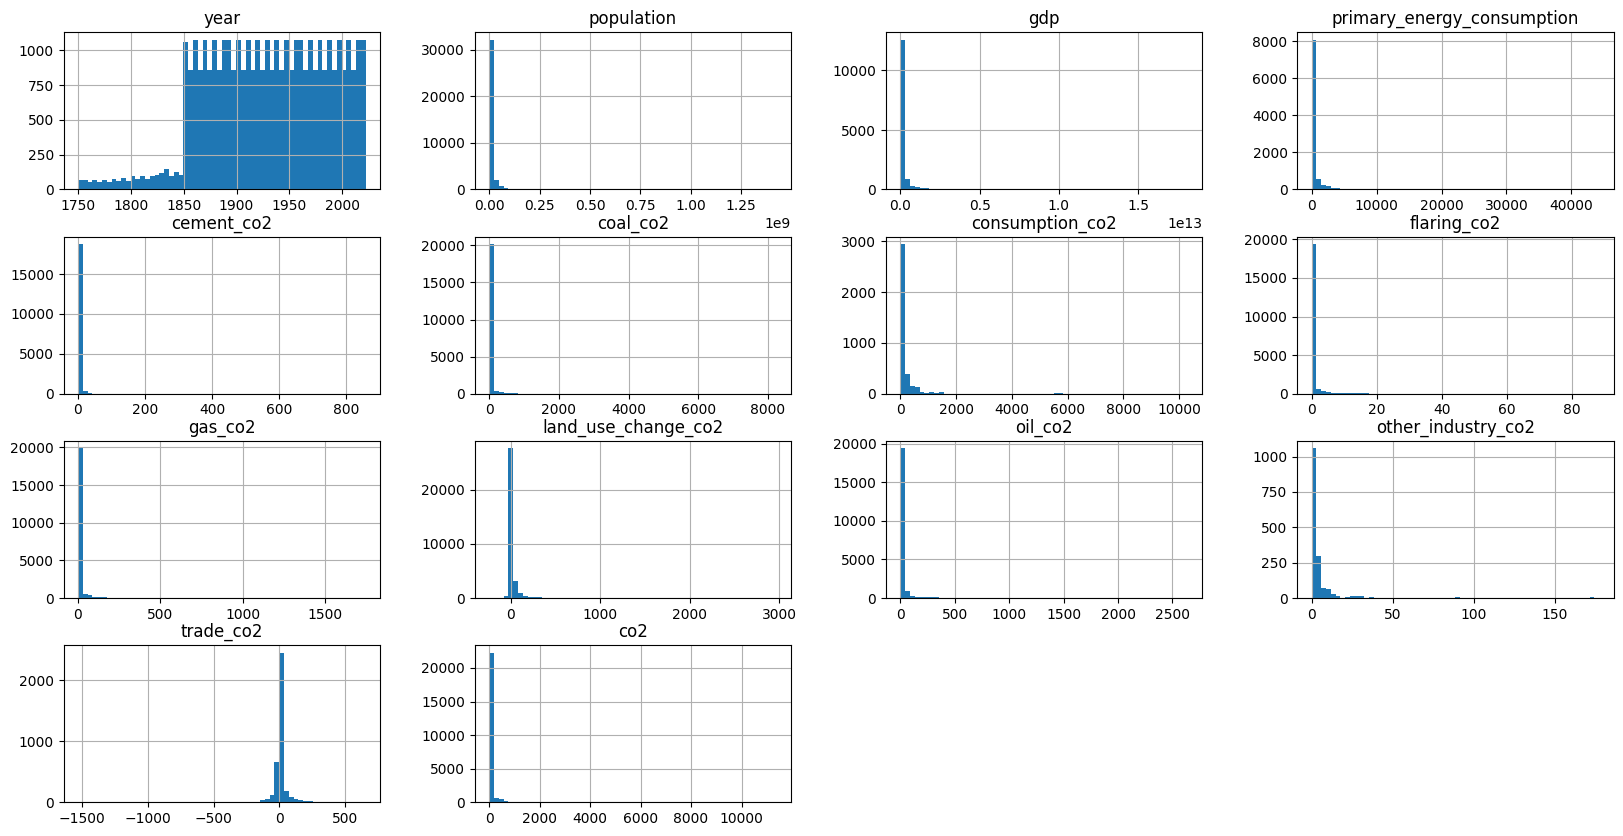

In [22]:
df_subset.hist(bins = 60, figsize = (20,10))

In [23]:
#countries with co2 emission more than 2000 million tones
df_subset[df_subset['co2'] > 2000]['country'].value_counts()

country
United States    82
China            37
Russia           14
India             9
Name: count, dtype: int64

In [24]:
#countries with trade co2 emission more than 500 million tones (import a lot of goods)
df_subset[(df_subset['trade_co2'] > 200)]['country'].value_counts()

country
United States    22
Japan            21
Germany           3
Singapore         1
Name: count, dtype: int64

In [25]:
#countries with trade co2 emission more than 500 million tones (exports a lot of goods)
df_subset[df_subset['trade_co2'] < -200]['country'].value_counts()

country
Russia     32
China      29
India       2
Kuwait      1
Ukraine     1
Name: count, dtype: int64

In [26]:
#countries with co2 emission from other industry more than 50 million tones
df_subset[df_subset['other_industry_co2'] > 50]['country'].value_counts()

country
China    37
Name: count, dtype: int64

In [27]:
#countries with oil co2 emission more than 500 million tones
df_subset[df_subset['oil_co2'] > 500]['country'].value_counts()

country
United States    85
Japan            44
China            27
Russia           23
India             9
Name: count, dtype: int64

In [28]:
#countries with land use change co2 emission more than 1000 million tones
df_subset[df_subset['land_use_change_co2'] > 1000]['country'].value_counts()

country
United States                   64
Brazil                          62
Russia                          34
China                           18
Indonesia                       11
Democratic Republic of Congo     1
Name: count, dtype: int64

In [29]:
#countries with gas co2 emission more than 500 million tones
df_subset[df_subset['gas_co2'] > 500]['country'].value_counts()

country
United States    67
Russia           41
China             5
Name: count, dtype: int64

In [30]:
#countries with flaring co2 emission more than 20 million tones
df_subset[df_subset['flaring_co2'] > 20]['country'].value_counts()

country
United States           52
Iran                    45
Nigeria                 36
Russia                  36
Venezuela               24
Saudi Arabia            16
Iraq                    14
United Arab Emirates     7
Algeria                  4
Kuwait                   4
Libya                    3
Indonesia                2
Australia                1
Name: count, dtype: int64

In [31]:
#countries with consumption co2 emission more than 2000 million tones
df_subset[df_subset['consumption_co2'] > 2000]['country'].value_counts()

country
China            32
United States    32
India             7
Russia            2
Name: count, dtype: int64

In [32]:
#countries with coal co2 emission more than 2000 million tones
df_subset[df_subset['coal_co2'] > 2000]['country'].value_counts()

country
China            32
United States    12
Name: count, dtype: int64

In [33]:
#countries with cement co2 emission more than 200 million tones
df_subset[df_subset['cement_co2'] > 200]['country'].value_counts()

country
China    26
Name: count, dtype: int64

In [34]:
#countries with primary energy consumption co2 emission more than 10000 million tones
df_subset[df_subset['primary_energy_consumption'] > 10000]['country'].value_counts()

country
United States    58
China            29
Russia            4
India             1
Name: count, dtype: int64

In [35]:
#countries with gdp more than 0.5e13
df_subset[df_subset['gdp'] > 0.5e13]['country'].value_counts()

country
United States    48
China            23
India             9
Name: count, dtype: int64

In [36]:
#countries with population more than 0.25e9
df_subset[df_subset['population'] > 0.25e9]['country'].value_counts()

country
China            173
India            154
United States     32
Indonesia         11
Name: count, dtype: int64

<Axes: xlabel='country', ylabel='coal_co2'>

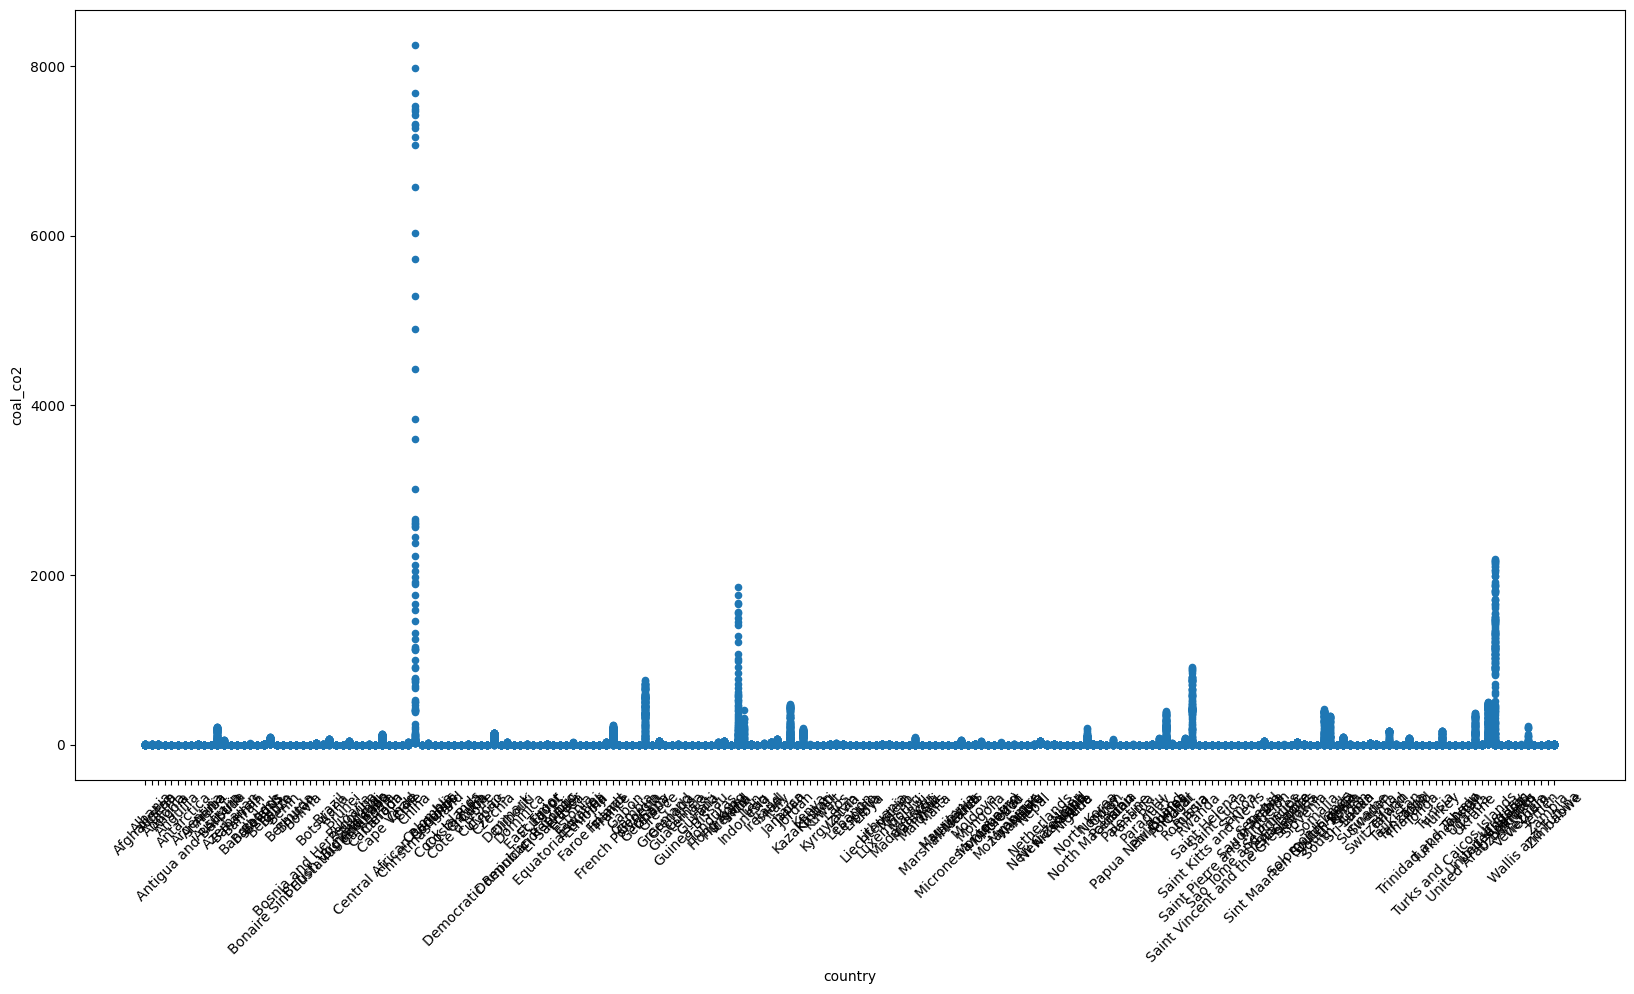

In [37]:
df_subset.plot(kind='scatter', x='country', y='coal_co2', figsize = (20,10), rot = 45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'China'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'Poland'),
  Text(5, 0, 'Russia'),
  Text(6, 0, 'United Kingdom'),
  Text(7, 0, 'United States')])

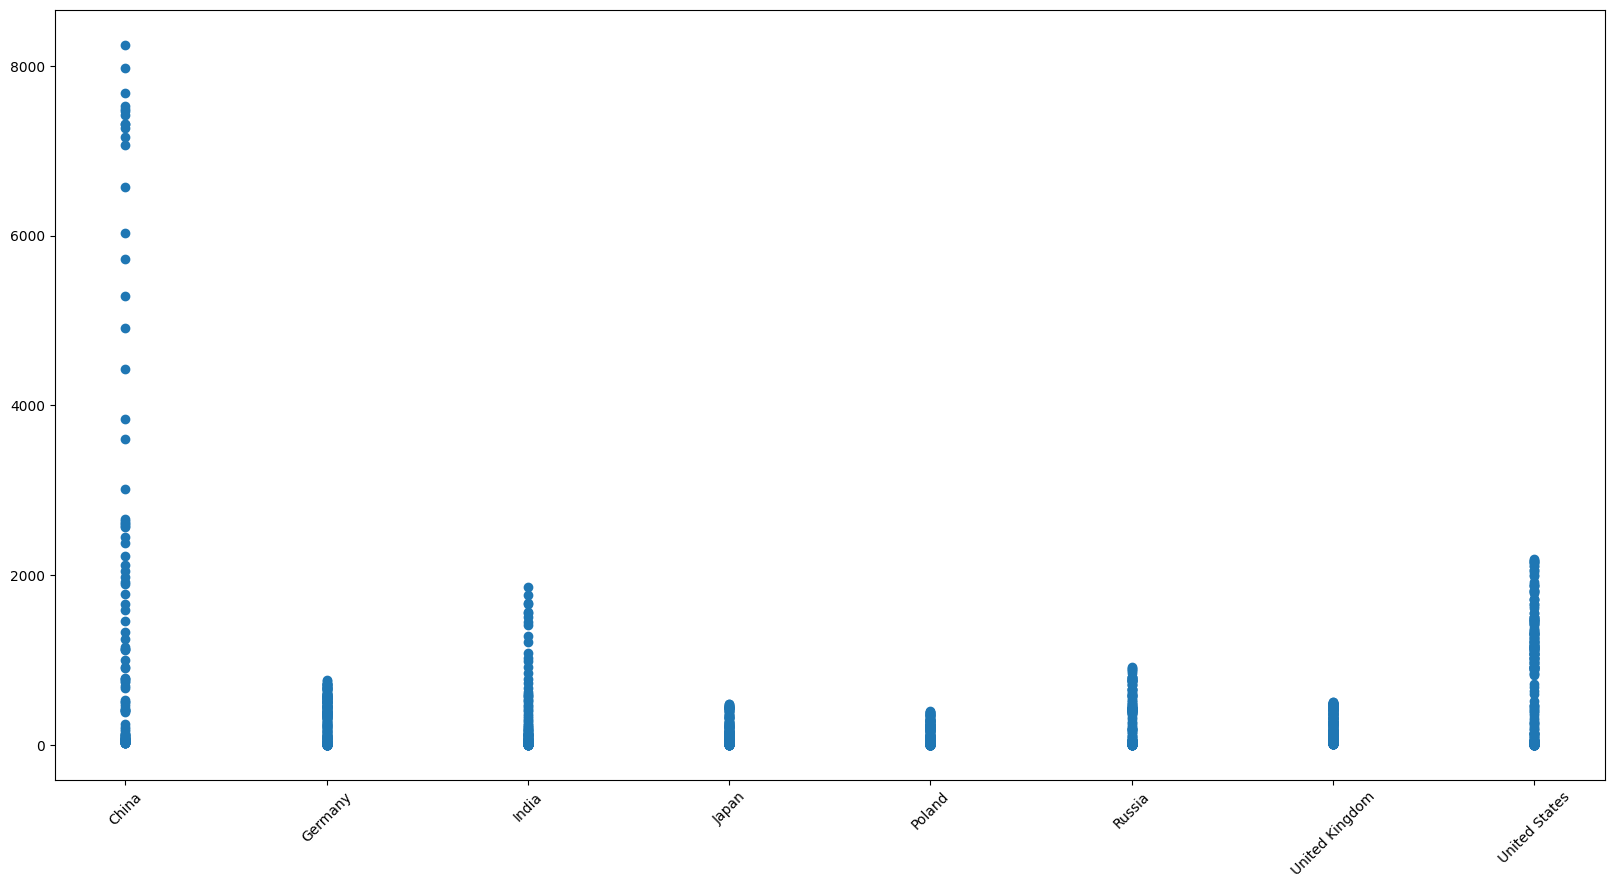

In [38]:
#Filter countries with cumulative coal_co2 greater than 20000
df_sum = df_subset.groupby('country').sum().reset_index()
df_sum = df_sum[df_sum['coal_co2'] >= 20000]

#Get the list of countries from df_sum
countries = df_sum['country'].tolist()

#Filter df_subset for countries with cumulative coal_co2 greater than 20000
df_filtered = df_subset[df_subset['country'].isin(countries)]

plt.scatter(df_filtered['country'], df_filtered['coal_co2'])
plt.gcf().set_size_inches(20, 10)  # Set figure size
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees


In [35]:
#save clean dataset into folder
df_subset.to_csv('data/owid-co2-data-clean.csv', index=False)

In [36]:
df_subset.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'primary_energy_consumption', 'cement_co2', 'coal_co2',
       'consumption_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2',
       'oil_co2', 'other_industry_co2', 'trade_co2', 'co2'],
      dtype='object')

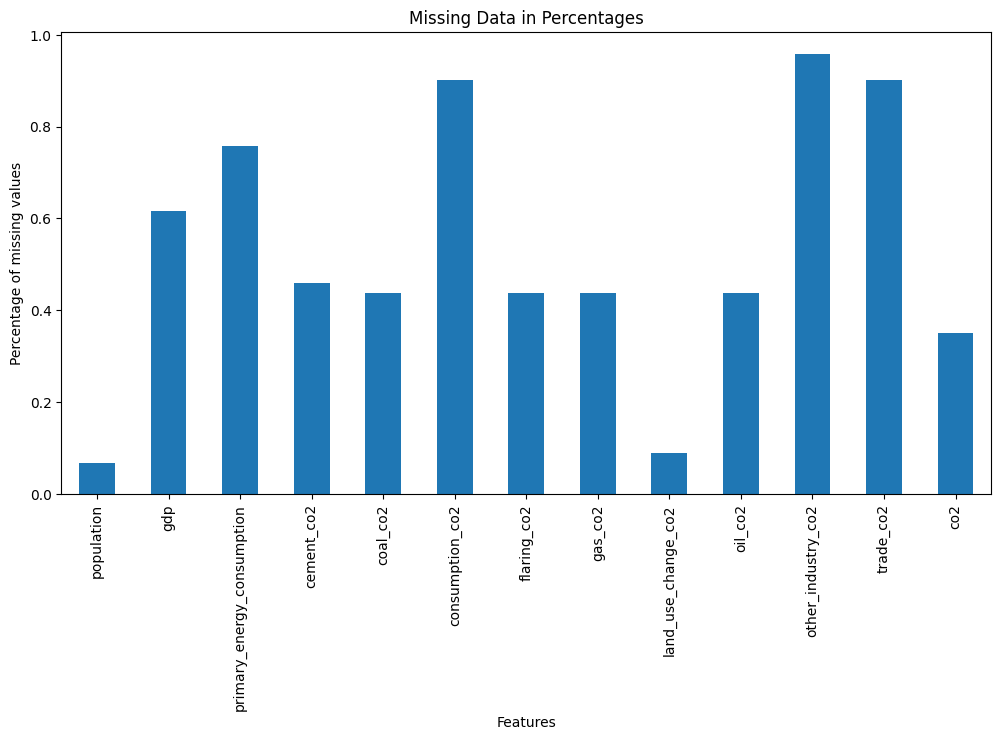

In [56]:
df_subset.isnull().mean().plot.bar(figsize=(12,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

<Axes: >

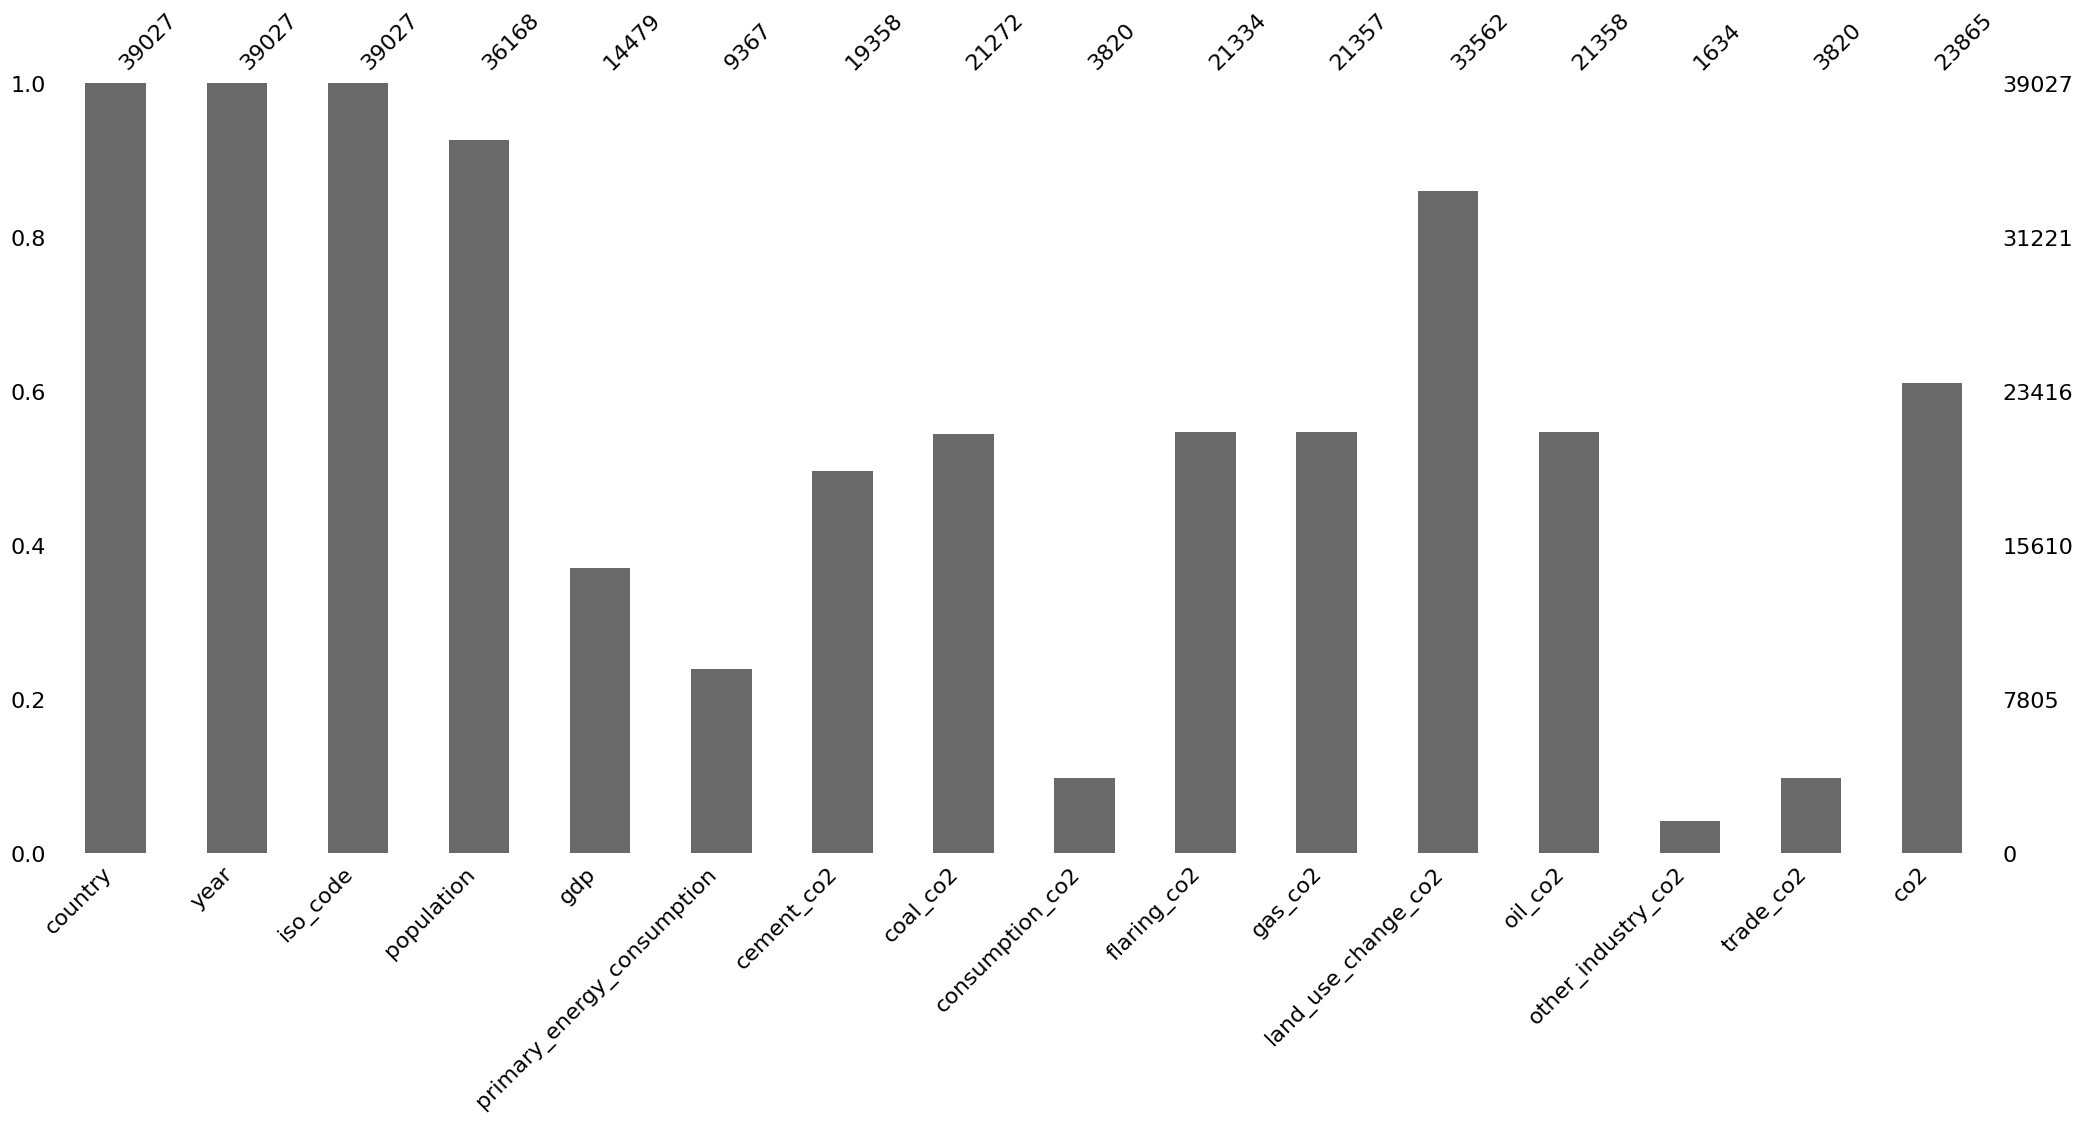

In [39]:
#Check how many missing values I have
import missingno as msno

msno.bar(df_subset)

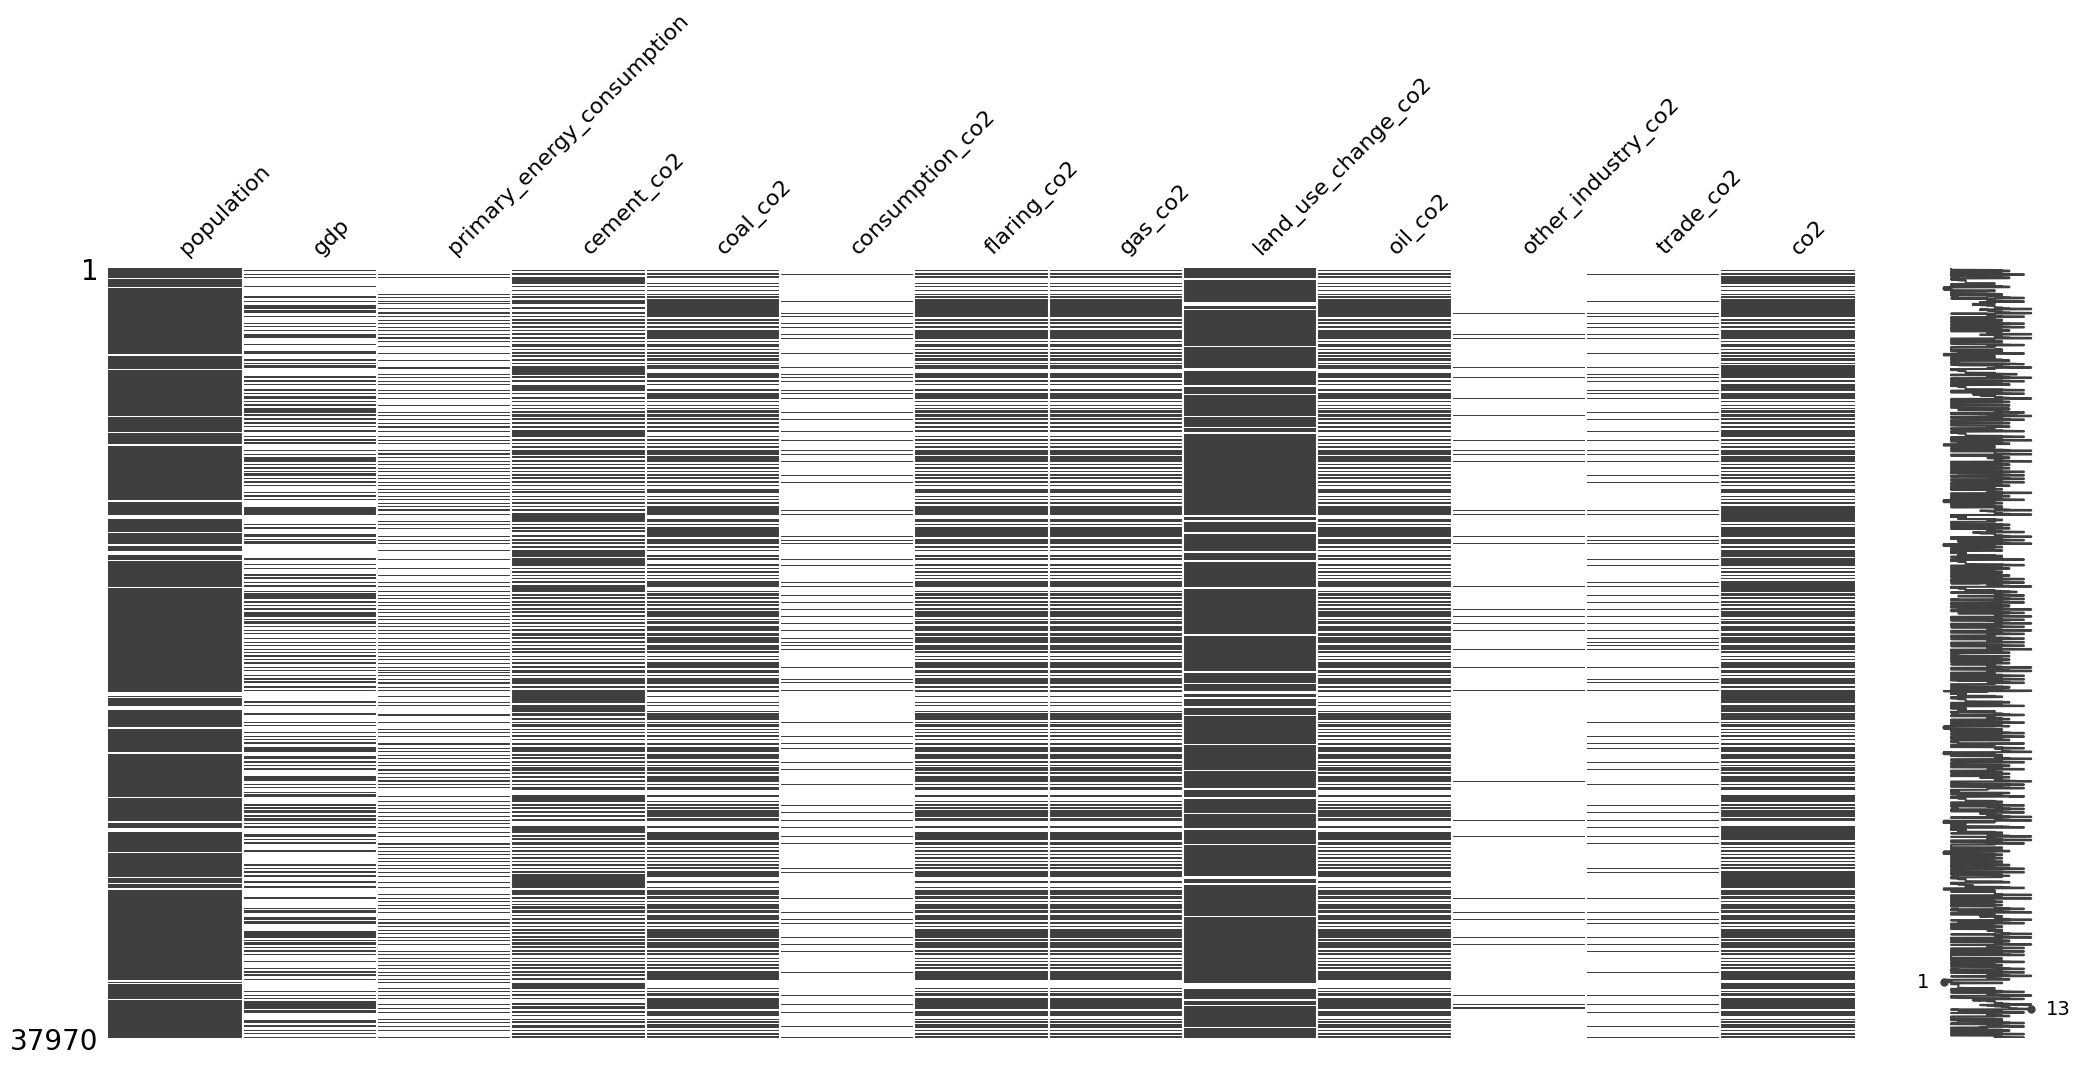

In [61]:
msno.matrix(df_subset);